In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [4]:
x1 = 1/(a**c1) / (1/(a**c1) + 1/(a**c2))
u1 = (c1-v1)*x1
u1

(c1 - 1)/(4**c1*(4**(-c2) + 4**(-c1)))

In [5]:
partial = sp.diff(u1, c1)
partial

-(c1 - 1)*log(4)/(4**c1*(4**(-c2) + 4**(-c1))) + 1/(4**c1*(4**(-c2) + 4**(-c1))) + (c1 - 1)*log(4)/(4**(2*c1)*(4**(-c2) + 4**(-c1))**2)

In [6]:
best = sp.Eq(partial, 0).evalf(subs={c2:1})
best

Eq(1.38629436111989*(c1 - 1.0)/(4.0**(2.0*c1)*(0.25 + 4.0**(-c1))**2) - 1.38629436111989*(c1 - 1.0)/(4.0**c1*(0.25 + 4.0**(-c1))) + 1/(4.0**c1*(0.25 + 4.0**(-c1))), 0)

In [7]:
sol = sp.solve(best)[0]

KeyboardInterrupt: 

In [8]:
x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
u1 = (c1-v1)*x1
u1

(c1 - 1)/(c1**4*(c2**(-4) + c1**(-4)))

In [9]:
partial = sp.diff(u1, c1)
partial

1/(c1**4*(c2**(-4) + c1**(-4))) - 4*(c1 - 1)/(c1**5*(c2**(-4) + c1**(-4))) + 4*(c1 - 1)/(c1**9*(c2**(-4) + c1**(-4))**2)

In [10]:
best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
best

Eq(1/(c1**4*(1.0 + c1**(-4))) - 4.0*(c1 - 1.0)/(c1**5*(1.0 + c1**(-4))) + 4.0*(c1 - 1.0)/(c1**9*(1.0 + c1**(-4))**2), 0)

In [12]:
sol = sp.solve(best)[0]
sol

1.44403322334350

In [419]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 2

# init conditions
curr1, curr2 = 1, 1
a = 4

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids12, p2Bids12 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(30)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids12.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids12.append(curr2)

100%|██████████| 30/30 [00:15<00:00,  1.94it/s]


In [420]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 8

# init conditions
curr1, curr2 = 1, 1
a = 4

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids18, p2Bids18 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(30)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids18.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids18.append(curr2)

100%|██████████| 30/30 [00:15<00:00,  1.92it/s]


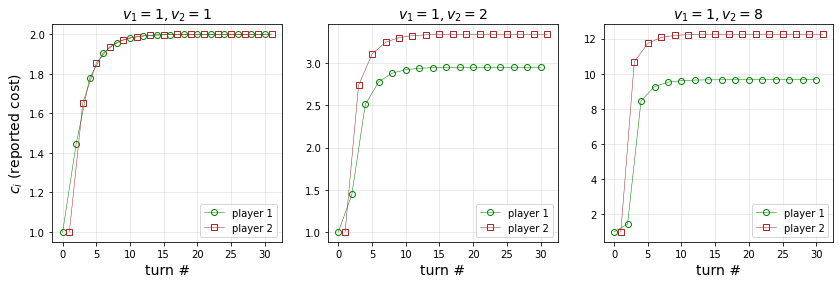

In [431]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,31,2), p1Bids11, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[0].plot(np.arange(1,32,2), p2Bids11, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[1].plot(np.arange(0,31,2), p1Bids12, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[1].plot(np.arange(1,32,2), p2Bids12, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[2].plot(np.arange(0,31,2), p1Bids18, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[2].plot(np.arange(1,32,2), p2Bids18, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[0].set_title(r'$v_1=1,v_2=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=8$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()